PHYS 105: Computational Physics I
Spring 2018
In-Class Exercise 5.2
Name:
Verify that the procedure described in Exercise 5.1 yields the same order for the simple numerical scheme if we just omit the acceleration term completely.
In other words, if the position and velocity steps are asymmetric, we are always limited by the less accurate of the two. This "reduced" version of our integration scheme is often referred to as the Euler method. Its chief advantage is ease of programming, but it isn't very accurate.
Instructions:
Run the code of In-Class Exercise 5.1 with the modified integrator step below and find the order of the error in the energy,
     a  = acc(x, v, t)
     x += v*dt
     v += a*dt
     t += dt

The energy error for -0.3010299956639812 is 7.525749885128038
The energy error for -0.6020599913279624 is 4.641375708952208
The energy error for -0.9030899869919435 is 2.3572399360805183
The energy error for -1.2041199826559248 is 1.0397359842097467
The energy error for -1.505149978319906 is 0.28014443553205126
The energy error for -1.806179973983887 is -0.22400743699686979
The energy error for -2.1072099696478683 is -0.6188089896202799
The energy error for -2.4082399653118496 is -0.964679166715724
The energy error for -2.709269960975831 is -1.2875395098517453
The energy error for -3.010299956639812 is -1.5993568917210088
The energy error for -3.3113299523037933 is -1.905748559774082
The energy error for -3.612359947967774 is -2.209451378503484
The energy error for -3.9133899436317554 is -2.5118157815055153
Slope: 1.311502369564857


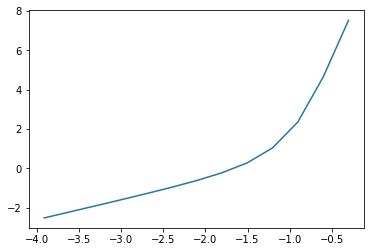

In [7]:
import sys, math
import matplotlib.pyplot as plt
import numpy as np

# FUNCTION DEFINITIONS ==============================

def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

# Particle Acceleration
def acc(x, v):
    return -K * x 

# Potential - calculated from acceleration
def potential(x):
    return .5 * K * x**2

# Total Energy
def energy(x, v):
    Etot = potential(x) + 0.5*v*v
    return Etot

# Analytic Solution - from lecture
def analytic_soln(t):
    x = .5 * V0 * math.sin(2*t)
    v = V0 * math.cos(2*t)
    return x, v

def output(x, v, t):
#     Print numerical and analytical solutions and the energy error
#     to cout.
    #print ('{:5.3f} {:5.3f} {:5.3f} {:5.3f}'.format(t, x, analytic_soln(t)[0], energy(x, v) - E0))
    pass

def take_a_step(x, v, t, dt):
    
    # Set the acceleration.
    a = acc(x, v)

    # Take the time step.
    
    xp = x
    x += v*dt
    v += a*dt
    t += dt
    return xp, x, v, t

def check_zero(xp, x, t):
    if len(zeros_list) == 0:
        if (xp < 0) and (x >= 0):
            zeros_list.append(interp(t-dt, xp, t, x, y=0))
        
# MAIN PROGRAM =====================================
 
# Define constants and initial conditions
energy_list = []
dt_list = []
DT = .5

while DT >= 1e-4:
    dt_list.append(DT)
    X0 = 0
    V0 = 1
    K  = 4
    
    # Initialize the system.

    t    = 0
    x    = X0
    xp   = x
    v    = V0
    dt   = DT
    tmax = 4*math.pi

    # Initialize Plotting Lists
    time_list = []
    numerical_list = []
    analytic_list = []
    zeros_list = []


    # initial energy
    E0 = energy(x, v)
    dEmax = 0
    while t <= tmax:

#         time_list.append(t)
    #     numerical_list.append(x)
    #     analytic_list.append(analytic_soln(t)[0])
        
#         check_zero(xp, x, t)
        (xp, x, v, t) = take_a_step(x, v, t, dt)

        # Print the results to stdout.
#         output(x, v, t)

        #Compute the maximum error.
        dE = energy(x, v) - E0
        if abs(dE) > dEmax: 
            dEmax = abs(dE)
    energy_list.append(dEmax)
    print('The energy error for {} is {}'.format(np.log10(DT), np.log10(dEmax)))
    DT /= 2
    
    
# Summarize to stderr.

# plt.figure(1)
# plt.plot(time_list, numerical_list, 'r-', label = 'Numerical')
# plt.plot(time_list, analytic_list, 'b--', label = 'Analytic')
# plt.title('Numerical and Analytic Plots VS Time.')
# plt.legend

# plt.figure(2)
# plt.plot(time_list, energy_list, 'g-')
# plt.title('Mechanical Energy as a function of time.')

# sys.stderr.write('V0 = {0:5.2f}, dt = {1:5.5f}, dEmax/E0 = {2:5.4f}'.format(V0,dt,dEmax))
# sys.stderr.write('\ndt to reduce absolute value is {}'.format(dt))


plt.plot(np.log10(dt_list), np.log10(energy_list), '-')
print('Slope: {}'.format((np.log10(energy_list)[6] - np.log10(energy_list)[5]) / 
                         (np.log10(dt_list)[6] - np.log10(dt_list)[5])))